<a href="https://colab.research.google.com/github/gsingla21/Machine_Learning/blob/main/Linear%20Regression%20and%20Sampling%20Methods/ML_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Q1

Load the dataset

In [ ]:
url='/content/drive/MyDrive/ML assignments/Assignment 4/Dataset/USA_Housing.csv'
import pandas as pd
dataset=pd.read_csv(url)

In [ ]:
print(dataset.info())
print("\nDataset: \n",dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB
None

Dataset: 
       Avg. Area Income  Avg. Area House Age  ...  Area Population         Price
0          79545.45857             5.682861  ...      23086.80050  1.059034e+06
1          79248.64245             6.002900  ...      40173.07217  1.505891e+06
2          61287.06718             5.865890  ...      36882.15940  1.058988e+06
3          63345.24005             7.188236

Check for null values using missingno
library as shown below:

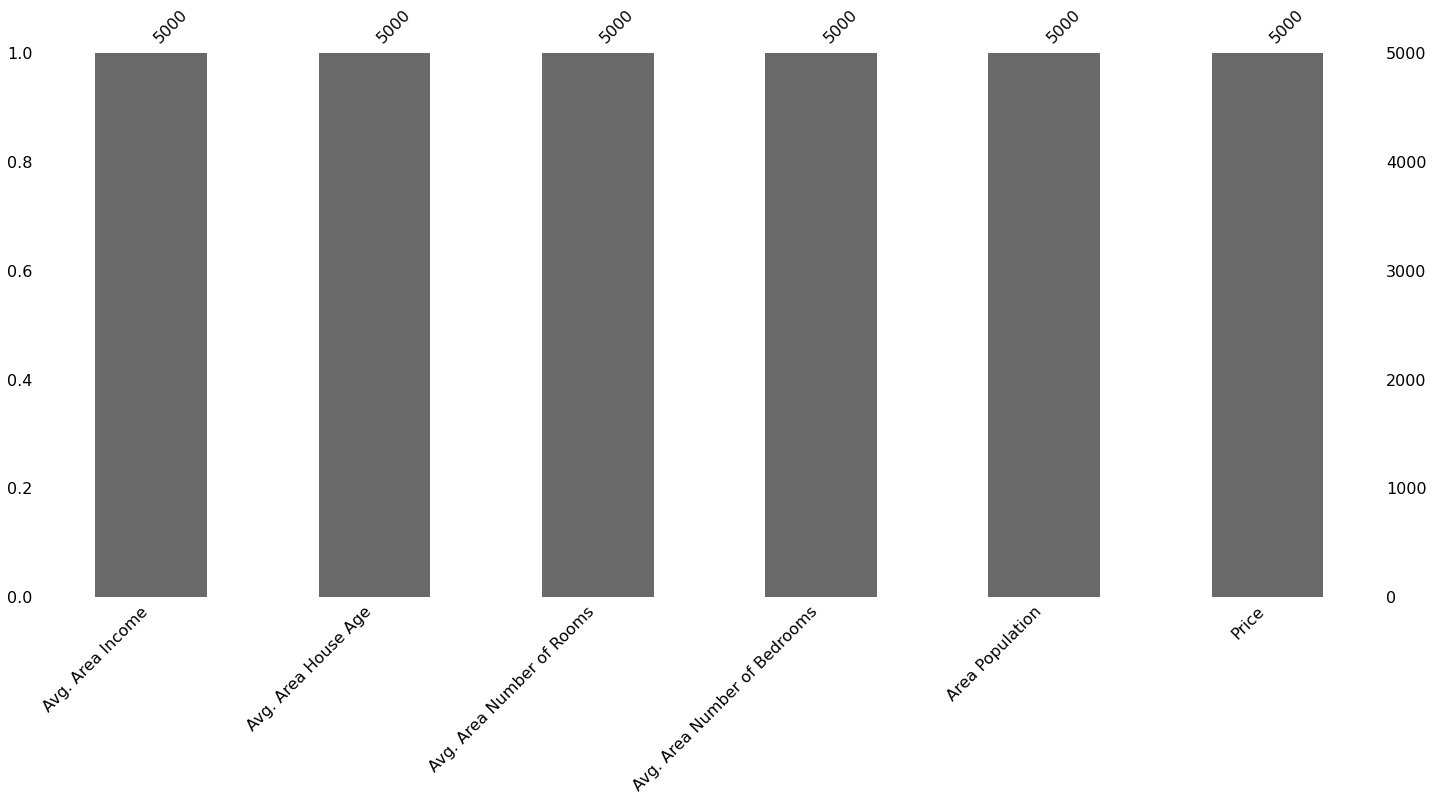

In [ ]:
import missingno as ms
ms.bar(dataset)

Check redundancy between input
features by plotting heatmap of correlation
between the input features:

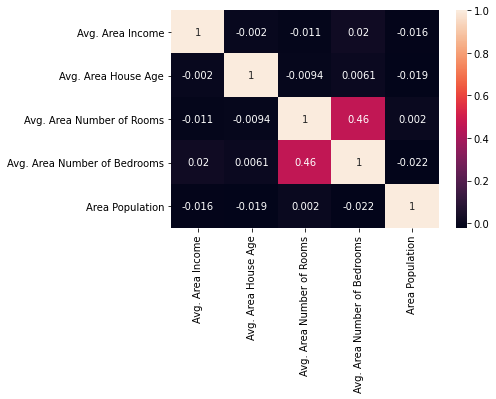

In [ ]:
import seaborn as sns
sns.heatmap(dataset.iloc[:,:-1].corr(),annot=True)

Since correlation between features is less (not
greater than 0.7 or 0.8), so feature
selection/extraction is not required.

1. Divide the dataset into input features (all columns except price) and output variable
(price)

In [ ]:
X=dataset.iloc[:, :-1].values
X.shape

(5000, 5)

In [ ]:
y=dataset.iloc[:,-1].values
y.shape

(5000,)

In [ ]:
import numpy as np
y=np.array(y)
y=y.reshape(-1,1)

In [ ]:
y.shape

(5000, 1)

2. Scale the values of input features.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

3. Divide input and output features into five folds.
4. Run five iterations, in each iteration consider one-fold as test set and remaining four sets
as training set. Find the beta (β) matrix, predicted values, and R2_score for each iteration
using least square error fit.
---



In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=0)
betas=[]
preds=[]
r2_scs=[]

X_trainings=[]
y_trainings=[]
X_testings=[]
y_testings=[]

from sklearn.metrics import r2_score

for train_index, test_index in kf.split(X_scaled,y):
  #print("Train:", train_index, "Validation:",test_index)
  
  X_train, X_test = X_scaled[train_index], X_scaled[test_index]
  y_train, y_test = y[train_index], y[test_index]
  X_trainings.append(X_train)
  y_trainings.append(y_train)
  X_testings.append(X_test)
  y_testings.append(y_test)

  A=X_train.T.dot(X_train)
  B=np.linalg.inv(A)
  C=B.dot(X_train.T)
  beta=C.dot(y_train)
  #print("beta: \n",len(beta))
  b=[]
  for i in range(len(beta)):
    b.append(beta[i][0])
  #print(b)
  betas.append(b)
  y_predict=X_test.dot(beta)
  #print("y predict:\n",y_predict)
  y_p=[]
  for i in range(len(y_predict)):
    y_p.append(y_predict[i][0])
  preds.append(y_p)


  error=y_test-y_predict
  square_error=np.power(error,2)
  sum_square_error=np.sum(square_error)
  y_mean=np.mean(y_test)
  total_variance=np.sum((y_test-y_mean)**2)
  r2=(1-sum_square_error/total_variance)
  r2_scs.append(r2)
  
print("beta calculated: ", len(betas))
print("predictions: ",len(preds))
print("max r2 score: ",max(r2_scs))
print("r2 scores: ",r2_scs)

beta calculated:  5
predictions:  5
max r2 score:  0.9237714874636407
r2 scores:  [0.9146454505152453, 0.9237714874636407, 0.9225228340345891, 0.9116675564115144, 0.915561803372487]


Aove max r2 score tells that the 2nd β is the best value to train regressor,

5. Use the best value of (β) matrix (for which R2_score is maximum), to train the regressor
for 70% of data and test the performance for remaining 30% data.

In [ ]:
print("X_trainings[0]: ",len(X_trainings[0]))
print("X_trainings: ",len(X_trainings))
print("X_testings[0]: ",len(X_testings[0]))
print("X_testings: ",len(X_testings))

print()

print("X_trainings[0]: ",len(y_trainings[0]))
print("X_trainings: ",len(y_trainings))
print("y_testings[0]: ",len(y_testings[0]))
print("y_testings: ",len(y_testings))

X_trainings[0]:  4000
X_trainings:  5
X_testings[0]:  1000
X_testings:  5

X_trainings[0]:  4000
X_trainings:  5
y_testings[0]:  1000
y_testings:  5


In [ ]:
from sklearn.linear_model import LinearRegression

# fit the model
model = LinearRegression().fit(X_trainings[1], y_trainings[1])
print("model.intercept_: ",model.intercept_)
print("model.coef_: ",model.coef_)


model.intercept_:  [1231708.732704]
model.coef_:  [[     0.         229691.19924452 163648.57968574 121961.79272243
    1825.51300146 149878.71640196]]


In [ ]:
model.score(X_trainings[1],  y_trainings[1])

0.9164426985558277

In [ ]:
model.score(X_testings[1],y_testings[1])

0.9237714874636407

#Q2

Consider the same dataset of Q1, rather than dividing the dataset into five folds, divide the
dataset into training set (56%), validation set (14%), and test set (30%).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
betas = []

#Scaling
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=np.insert(X_scaled, 0, values = 1, axis = 1)

#Train-Test-Val Set Split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 1)

In [ ]:
print("x_train.shape",x_train.shape)
print("x_val.shape",x_val.shape)
print("x_test.shape",x_test.shape)

x_train.shape (2800, 6)
x_val.shape (700, 6)
x_test.shape (1500, 6)


In [ ]:
print("y_train.shape",y_train.shape)
print("y_val.shape",y_val.shape)
print("y_test.shape",y_test.shape)

y_train.shape (2800,)
y_val.shape (700,)
y_test.shape (1500,)


In [ ]:
def gradient_descent(lr,iter):
  beta = np.zeros(6)
  for i in range(iter):
    x0_gradient=0
    x1_gradient=0
    x2_gradient=0
    x3_gradient=0
    x4_gradient=0
    x5_gradient=0
    for j in range(n):
      a = x_train[j,0]
      b = x_train[j,1]
      c = x_train[j,2]
      d = x_train[j,3]
      e = x_train[j,4]
      f = y_train[j]
      x0_gradient+=(beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)
      x1_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*a)
      x2_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*b)
      x3_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*c)
      x4_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*d)
      x5_gradient+=((beta[0]+(beta[1]*a)+(beta[2]*b)+(beta[3]*c)+(beta[4]*d)+(beta[5]*e)-f)*e)
    beta[0]=beta[0]-lr/n*x0_gradient
    beta[1]=beta[1]-lr/n*x1_gradient
    beta[2]=beta[2]-lr/n*x2_gradient
    beta[3]=beta[3]-lr/n*x3_gradient
    beta[4]=beta[4]-lr/n*x4_gradient
    beta[5]=beta[5]-lr/n*x5_gradient
  return beta

lr=0.001

In [ ]:
betas=[]

In [ ]:
lr=0.001
beta=gradient_descent(lr,1000)
betas.append(beta)

In [ ]:
r2=[]

In [ ]:
from sklearn.metrics import r2_score
y_pred_val = x_val.dot(beta)
z=r2_score(y_val, y_pred_val)
print(z)
r2.append(z)

-4.1433699004729805


lr=0.01

In [ ]:
lr=0.01
beta=gradient_descent(lr,1000)
betas.append(beta)

In [ ]:
y_pred_val = x_val.dot(beta)
z=r2_score(y_val, y_pred_val)
print(z)
r2.append(z)

-3.939146008885926


lr=0.1

In [ ]:
lr=0.1
beta=gradient_descent(lr,1000)
betas.append(beta)

In [ ]:
y_pred_val = x_val.dot(beta)
z=r2_score(y_val, y_pred_val)
print(z)
r2.append(z)

-3.940841631829529


lr=1

In [ ]:
lr=1
beta=gradient_descent(lr,1000)
betas.append(beta)

In [ ]:
y_pred_val = x_val.dot(beta)
z=r2_score(y_val, y_pred_val)
print(z)
r2.append(z)

-5747.690357269162


get the best

In [ ]:
max_index = r2.index(max(r2))
optimal_beta = betas[max_index]
y_pred_final = x_test.dot(optimal_beta)
r2_final = r2_score(y_test, y_pred_final)

In [ ]:
best_beta=betas[max_index]
best_r2=r2[max_index]
print("best_beta: ",best_beta)
print("\n")
print("best_r2: ",best_r2)

best_beta:  [616581.56074126 616581.56074126 227118.83257667 162662.02019426
 124606.48810405    864.78988514]


best_r2:  -3.939146008885926


#Q3

1. Load the dataset with following column names ["symboling", "normalized_losses",
"make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",
"engine_location", "wheel_base", "length", "width", "height", "curb_weight",
"engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
"compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [ ]:
import pandas as pd
headers=["symboling", "normalized_losses", "make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",
"engine_location", "wheel_base", "length", "width", "height", "curb_weight","engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
"compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ML assignments/Assignment 4/Dataset/imports-85.data",
                  header=None, names=headers, na_values="?" )

In [ ]:
data

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


replace all ? values with NaN

In [ ]:
data.replace('?',np.nan)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num_doors          203 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  num_cylinders      205 non-null    object 
 16  engine_size        205 non

2. Drop the rows with NaN
values in price column

In [ ]:
data.isnull().sum()

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [ ]:
data = data.dropna(subset=['price'])

In [ ]:
data.isnull().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_doors             2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_cylinders         0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

Replace all NaN values with central tendency imputation.

In [ ]:
data=data.fillna(data.mean())

In [ ]:
data.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            2
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

3. There are 10 columns in the dataset with non-numeric values. Convert these values to
numeric values using following scheme:

3. 1. For “num_doors” and “num_cylinders”: convert words (number names) to figures
for e.g., two to 2  

In [ ]:
import numpy as np
print(data['num_doors'].value_counts().idxmax())
data["num_doors"].replace(np.nan, "four", inplace=True)
data["num_doors"].value_counts()

four


four    115
two      86
Name: num_doors, dtype: int64

In [ ]:
data["num_cylinders"].value_counts()

four      157
six        24
five       10
eight       4
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64

In [ ]:
cleanup_nums = {"num_doors":{"four": 4, "two": 2},
                "num_cylinders":{"four": 4, "six": 6, "five": 5, "two": 2, "eight": 8, "three":3, "twelve": 12}}
data=data.replace(cleanup_nums)

In [ ]:
print("data['num_doors']: ",data["num_doors"])
print()
print("data['num_cylinders']",data["num_cylinders"])

data['num_doors']:  0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: num_doors, Length: 201, dtype: int64

data['num_cylinders'] 0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: num_cylinders, Length: 201, dtype: int64


3. 2. For "body_style", "drive_wheels": use dummy encoding scheme

In [ ]:
data['body_style']

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body_style, Length: 201, dtype: object

In [ ]:
data=pd.get_dummies(data, columns=["body_style"], prefix=["body"])

In [ ]:
data.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'drive_wheels', 'engine_location', 'wheel_base', 'length',
       'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders',
       'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio',
       'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price',
       'body_convertible', 'body_hardtop', 'body_hatchback', 'body_sedan',
       'body_wagon'],
      dtype='object')

In [ ]:
data.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors              int64
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders          int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
body_convertible       uint8
body_hardtop           uint8
body_hatchback         uint8
body_sedan             uint8
body_wagon             uint8
dtype: object

3. 3. For “make”, “aspiration”, “engine_location”,fuel_type: use label encoding
scheme

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data["make"]=labelencoder.fit_transform(data["make"])
data["aspiration"]=labelencoder.fit_transform(data["aspiration"])
data["engine_location"]=labelencoder.fit_transform(data["engine_location"])
data["fuel_type"]=labelencoder.fit_transform(data["fuel_type"])

In [ ]:
print("data['make']:\n",data["make"])
print("data['aspiration']:\n",data["aspiration"])
print("data['engine_location']:\n",data["engine_location"])
print("data['fuel_type']:\n",data["fuel_type"])

data['make']:
 0       0
1       0
2       0
3       1
4       1
       ..
200    21
201    21
202    21
203    21
204    21
Name: make, Length: 201, dtype: int64
data['aspiration']:
 0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    1
202    0
203    1
204    1
Name: aspiration, Length: 201, dtype: int64
data['engine_location']:
 0      0
1      0
2      0
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: engine_location, Length: 201, dtype: int64
data['fuel_type']:
 0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fuel_type, Length: 201, dtype: int64


3. 4. For fuel_system: replace values containing string pfi to 1 else all values to 0.

In [ ]:
print((data["fuel_system"].unique()))

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [ ]:
data["fuel_system_without_pfi"]=np.where(data["fuel_system"].str.contains("pfi"),1,0)

In [ ]:
del data["fuel_system"]
data["fuel_system_without_pfi"]

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    0
204    1
Name: fuel_system_without_pfi, Length: 201, dtype: int64

3. 5. For engine_type: replace values containing string ohc to 1 else all values to 0.

In [ ]:
data["engine_type"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf'], dtype=object)

In [ ]:
data["engine_type_without_ohc"]=np.where(data["engine_type"].str.contains("ohc"),1,0)

In [ ]:
del data["engine_type"]
data["engine_type_without_ohc"]

0      1
1      1
2      1
3      1
4      1
      ..
200    1
201    1
202    1
203    1
204    1
Name: engine_type_without_ohc, Length: 201, dtype: int64

In [ ]:
data.dtypes

symboling                    int64
normalized_losses          float64
make                         int64
fuel_type                    int64
aspiration                   int64
num_doors                    int64
drive_wheels                object
engine_location              int64
wheel_base                 float64
length                     float64
width                      float64
height                     float64
curb_weight                  int64
num_cylinders                int64
engine_size                  int64
bore                       float64
stroke                     float64
compression_ratio          float64
horsepower                 float64
peak_rpm                   float64
city_mpg                     int64
highway_mpg                  int64
price                      float64
body_convertible             uint8
body_hardtop                 uint8
body_hatchback               uint8
body_sedan                   uint8
body_wagon                   uint8
fuel_system_without_

In [ ]:
del data["drive_wheels"]

4. Divide the dataset into input features (all columns except price) and output variable
(price). Scale all input features. 

In [ ]:
y=data["price"].values
y.shape

(201,)

In [ ]:
X=data.iloc[:,data.columns != "price"].values
X.shape

(201, 28)

In [ ]:
import numpy as np
y=np.array(y)
y=y.reshape(-1,1)

In [ ]:
data.dtypes

symboling                    int64
normalized_losses          float64
make                         int64
fuel_type                    int64
aspiration                   int64
num_doors                    int64
engine_location              int64
wheel_base                 float64
length                     float64
width                      float64
height                     float64
curb_weight                  int64
num_cylinders                int64
engine_size                  int64
bore                       float64
stroke                     float64
compression_ratio          float64
horsepower                 float64
peak_rpm                   float64
city_mpg                     int64
highway_mpg                  int64
price                      float64
body_convertible             uint8
body_hardtop                 uint8
body_hatchback               uint8
body_sedan                   uint8
body_wagon                   uint8
fuel_system_without_pfi      int64
engine_type_without_

In [ ]:
X

array([[  3., 122.,   0., ...,   0.,   1.,   1.],
       [  3., 122.,   0., ...,   0.,   1.,   1.],
       [  1., 122.,   0., ...,   0.,   1.,   1.],
       ...,
       [ -1.,  95.,  21., ...,   0.,   1.,   1.],
       [ -1.,  95.,  21., ...,   0.,   0.,   1.],
       [ -1.,  95.,  21., ...,   0.,   1.,   1.]])

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

5. Train a linear regressor on 70% of data (using inbuilt linear regression function of
Python) and test its performance on remaining 30% of data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

compute the regression coefficients

In [ ]:
A=X_train.T.dot(X_train)
B=np.linalg.inv(A)
C=B.dot(X_train.T)
beta=C.dot(y_train)
print(beta)

[[ 1.30457824e+04]
 [ 3.51986925e+02]
 [ 2.47444537e+02]
 [-9.20662223e+02]
 [ 3.87476490e+03]
 [ 5.48991753e+02]
 [ 2.33563890e+02]
 [ 1.47665039e+03]
 [ 2.08309444e+03]
 [-5.43518014e+02]
 [ 6.07297868e+02]
 [ 2.68160134e+02]
 [ 8.03521557e+02]
 [-1.00863312e+03]
 [ 4.19183456e+03]
 [-6.73361129e+02]
 [-8.85762286e+02]
 [ 4.23101107e+03]
 [ 1.01696776e+03]
 [ 2.07272144e+02]
 [-4.97940210e+02]
 [-1.57002825e+02]
 [ 8.01427919e+02]
 [ 6.13640478e+02]
 [ 7.85721290e+02]
 [ 1.14886724e+03]
 [ 1.78940255e+02]
 [-3.37529052e+00]
 [ 4.42393105e+02]]


In [ ]:
z=[]
for i in range(len(beta)):
  z.append(beta[i][0])

In [ ]:
z.sort
z

[13045.78235491603,
 351.9869248435624,
 247.44453732667603,
 -920.6622233156007,
 3874.7649047281884,
 548.9917532292143,
 233.5638903907627,
 1476.6503912130074,
 2083.094440269405,
 -543.5180142185516,
 607.2978683146673,
 268.16013397134134,
 803.5215568242597,
 -1008.6331199984287,
 4191.834562019655,
 -673.3611288362506,
 -885.7622860365575,
 4231.011074927104,
 1016.9677601635276,
 207.27214435682612,
 -497.9402104481751,
 -157.0028247590967,
 801.4279188405208,
 613.6404782942382,
 785.7212897659351,
 1148.8672447391232,
 178.94025545813133,
 -3.3752905157521127,
 442.39310531230103]

6. Reduce the dimensionality of the feature set using inbuilt PCA decomposition

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_new = pca.fit_transform(X)

In [ ]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [ ]:
A=X_train_new.T.dot(X_train_new)
B=np.linalg.inv(A)
C=B.dot(X_train_new.T)
beta_new=C.dot(y_train_new)
print(beta_new)

[[8.81983675]
 [7.95212983]]
